## Дипломная работа: модель аренды ресурсов на цифровой платформе

#### Выполнила: Ларина Елизавета, группа э402

#### Описание переменных: 

    N - максимально возможное число участников платформы  
    M - количество видов ресурсов, которые участники могут сдавать или брать в аренду   
    F - число повторений запуска кода (сколько раз производится рандомизированное распределение потребностей в ресурсах и видов этих ресурсов между фирмами)  
    sigma - среднеквадратическое отклонение для распределения ресурсов  

In [1]:
# загрузка основных пакетов

import numpy as np
import random
import math
import matplotlib.pyplot as plt



#### Формула и график совокупной ожидаемой полезности участников от присутствия на платформе других участников, интерес которых составляет тот же вид товара:

Можно задавать параметры N и M такие, что M>>N

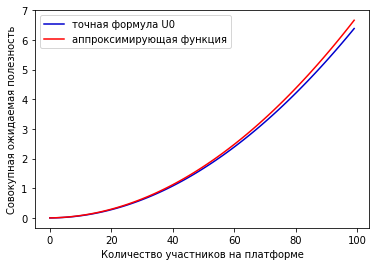

In [2]:
N=100
M=1500

def utility_1(n):
    return n*(1-((M-1)/M)**(n-1))

def utility_2(n):
    return (math.log(M/(M-1)))*n**2

Utility1 = []
Utility2 = []

for i in range(0, N):
    Utility1.append(utility_1(i+1))
    Utility2.append(utility_2(i+1))
    
plt.plot(Utility1, color = 'mediumblue', label = 'точная формула U0') 
plt.plot(Utility2, color = 'red', label = 'аппроксимирующая функция') 
plt.xlabel('Количество участников на платформе')
plt.ylabel('Совокупная ожидаемая полезность')
plt.legend(fontsize=10)
#plt.savefig('image1.pdf')

  
#### Модель 1: модель аренды ресурсов без учета разнообразия видов товара:

Можно задавать параметры N, sigma, F

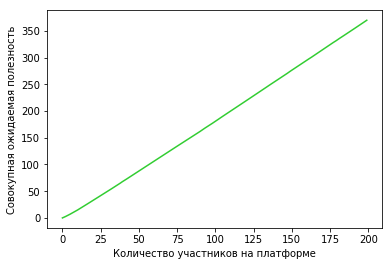

In [140]:
#без формулы
N = 200
M = 1
sigma = 5
F = 2000

class firm:
    def __init__(self):
        self.m = random.randint(0, M-1)
        self.x = round(random.gauss(0, sigma))
    def _print(self):
        print(self.m, '  ', self.x)
        
average = [0 for j in range(0, N)]
        
for k in range(0, F):
        
    remaining_demand = [0 for j in range(0, M)]
    firms = []
    total_initial_demand = []
    total_remaining_demand = []
    
    sum=0
    for i in range(0, N):
        firms.append(firm())
        remaining_demand[firms[i].m] += firms[i].x
        s = 0
        for j in range(0, M):
            if remaining_demand[j] < 0:
                s += abs(remaining_demand[j])
        total_remaining_demand.append(s)
        if firms[i].x < 0:
            sum += -firms[i].x
        total_initial_demand.append(sum)
    total_benefit = np.subtract(total_initial_demand, total_remaining_demand)
    average = np.add(average, total_benefit)

average_benefit = average/F
    
plt.plot(average_benefit, color = 'limegreen', label = 'в модели')
plt.xlabel('Количество участников на платформе')
plt.ylabel('Совокупная ожидаемая полезность')
#plt.savefig('image4.pdf')


#### Модель 2: модель аренды ресурсов с учетом разнообразия видов товара:

Можно задавать параметры N и M такие, что M>>N, а также параметры sigma, F

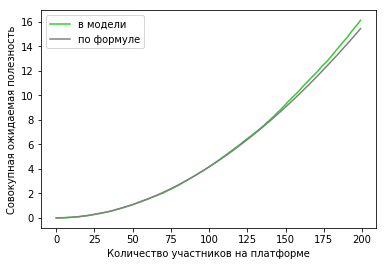

In [178]:
N = 200
M = 800
sigma = 3
F = 2000

class firm:
    def __init__(self):
        self.m = random.randint(0, M-1)
        self.x = round(random.gauss(0, sigma))
    def _print(self):
        print(self.m, '  ', self.x)
        
average = [0 for j in range(0, N)]
        
for k in range(0, F):
        
    remaining_demand = [0 for j in range(0, M)]
    firms = []
    total_initial_demand = []
    total_remaining_demand = []
    
    sum=0
    for i in range(0, N):
        firms.append(firm())
        remaining_demand[firms[i].m] += firms[i].x
        s = 0
        for j in range(0, M):
            if remaining_demand[j] < 0:
                s += abs(remaining_demand[j])
        total_remaining_demand.append(s)
        if firms[i].x < 0:
            sum += -firms[i].x
        total_initial_demand.append(sum)
    total_benefit = np.subtract(total_initial_demand, total_remaining_demand)
    average = np.add(average, total_benefit)

average_benefit = average/F

utility_theoretical=[]
for n in range(1, N+1):
    Utility = (n/4)*(2**0.5*sigma/math.pi**0.5-3.3032*sigma/10)*(1-((M-1)/M)**(n-1))
    utility_theoretical.append(Utility)
    
plt.plot(average_benefit, color = 'limegreen', label = 'в модели')
plt.plot(utility_theoretical, color = 'grey', label = 'по формуле')
plt.xlabel('Количество участников на платформе')
plt.ylabel('Совокупная ожидаемая полезность')
plt.legend(fontsize=10)

In [179]:
# отличие между графиками в разных точках

print(round(average_benefit[150]/utility_theoretical[150],2))
print(round(average_benefit[50]/utility_theoretical[50],2))

1.02
1.0



#### Зависимость остаточной потребности от параметра sigma:

[-0.6618, -1.3222, -1.9825, -2.6426, -3.3032, -3.9639, -4.6312, -5.2857, -5.9466]


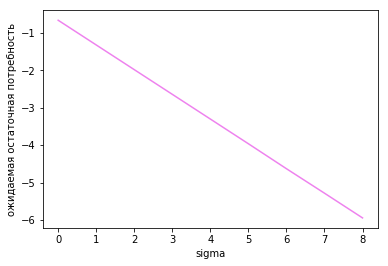

In [160]:
sigm=[]
for sig in range(1,10):
    fk=0
    for re in range(0,2000):
        n=0
        s=0
        for i in range(0,2000):
            x = random.gauss(0, sig)
            y = random.gauss(0, sig)
            if x + y < 0:
                if x*y<0:
                    s+=(x+y)
                    n=n+1
        k=s/n
        fk+=k
    sigm.append(round(fk/2000,4))
plt.plot(sigm, color = 'violet')
plt.xlabel('sigma')
plt.ylabel('ожидаемая остаточная потребность')
print(sigm)